In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import heapq

In [49]:
df = pd.read_csv('../../results/full_search/remote/sherwood_rothera_0/type_summary5.csv')

df = df[df['is_feasible'] == 1]
df = df.drop(['time', 'folderid', 'days_in_chunk', 'is_feasible'], axis=1)

In [12]:
df_by = pd.DataFrame()

for (conf, epsilon), df_gby in df.groupby(['conf', 'epsilon']):
    if conf == 0.75:
        continue
    print(conf, epsilon)
    print(df_gby.sort_values('typeid'))
    print(df_gby['cost'].idxmin())
    print(df_gby.loc[df_gby['cost'].idxmin()])
    df_by = df_by.append(df_gby.loc[df_gby['cost'].idxmin()])
    print()

0.85 0.45
     typeid  conf  epsilon    battery        pv0         pv1        pv2  \
309      10  0.85     0.45  835.94395    0.00000  1003.17100   0.000000   
394      11  0.85     0.45  871.07582  160.88806   960.39737   0.000000   
370      14  0.85     0.45  581.12643    0.00000  1042.72260  66.184579   
379      26  0.85     0.45  878.19055    0.00000   982.63376   0.000000   

            pv3        pv4      cost  duration  sim_called  
309   857.72090   0.000000  930228.0      3437     1409920  
394   722.42519   0.000000  960533.0      9575     3795340  
370  1033.20910   0.000000  822415.0      7077     3001500  
379   784.09902  78.316093  965552.0      7813     3068060  
370
typeid        1.400000e+01
conf          8.500000e-01
epsilon       4.500000e-01
battery       5.811264e+02
pv0           0.000000e+00
pv1           1.042723e+03
pv2           6.618458e+01
pv3           1.033209e+03
pv4           0.000000e+00
cost          8.224150e+05
duration      7.077000e+03
sim_call

In [13]:
df_by

,battery,conf,cost,duration,epsilon,pv0,pv1,pv2,pv3,pv4,sim_called,typeid
370,581.126430,0.85,822415.0,7077.0,0.45,0.0,1042.72260,66.184579,1033.20910,0.0,3001500.0,14.0
372,123.223850,0.85,433392.0,7191.0,0.55,0.0,929.84345,30.805454,744.45549,0.0,3073024.0,14.0
293,2.142046,0.85,155941.0,2990.0,0.65,0.0,687.66741,27.179951,0.00000,0.0,1042386.0,6.0
382,1087.473400,0.95,1100870.0,8166.0,0.45,0.0,1010.79910,0.000000,861.36326,0.0,4097730.0,10.0
410,258.734350,0.95,518925.0,18891.0,0.55,0.0,871.77779,67.705090,737.67077,0.0,9322259.0,14.0
375,3.843131,0.95,177489.0,7266.0,0.65,0.0,786.55173,36.756808,0.00000,0.0,3124287.0,6.0


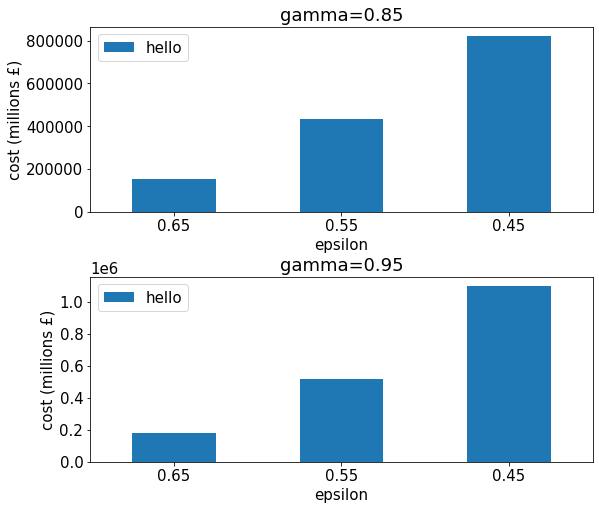

In [88]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 8))

for i, (conf, df_conf) in enumerate(df_by.groupby(['conf'])):
    axes[i].set_xticks([0.45, 0.55, 0.65])
    axes[i].set_xlim(0.7, 0.4)
    axes[i].set_title(f'gamma={conf}')
    axes[i].set_xlabel('epsilon')
    axes[i].set_ylabel('cost (millions £)')

    axes[i].bar(df_conf['epsilon'], df_conf['cost'], 0.05, label='hello')
    axes[i].legend()

fig.subplots_adjust(hspace=0.35)
fig.show()

In [185]:
df_by['thousands_cost'] = df_by['cost'] / 1000

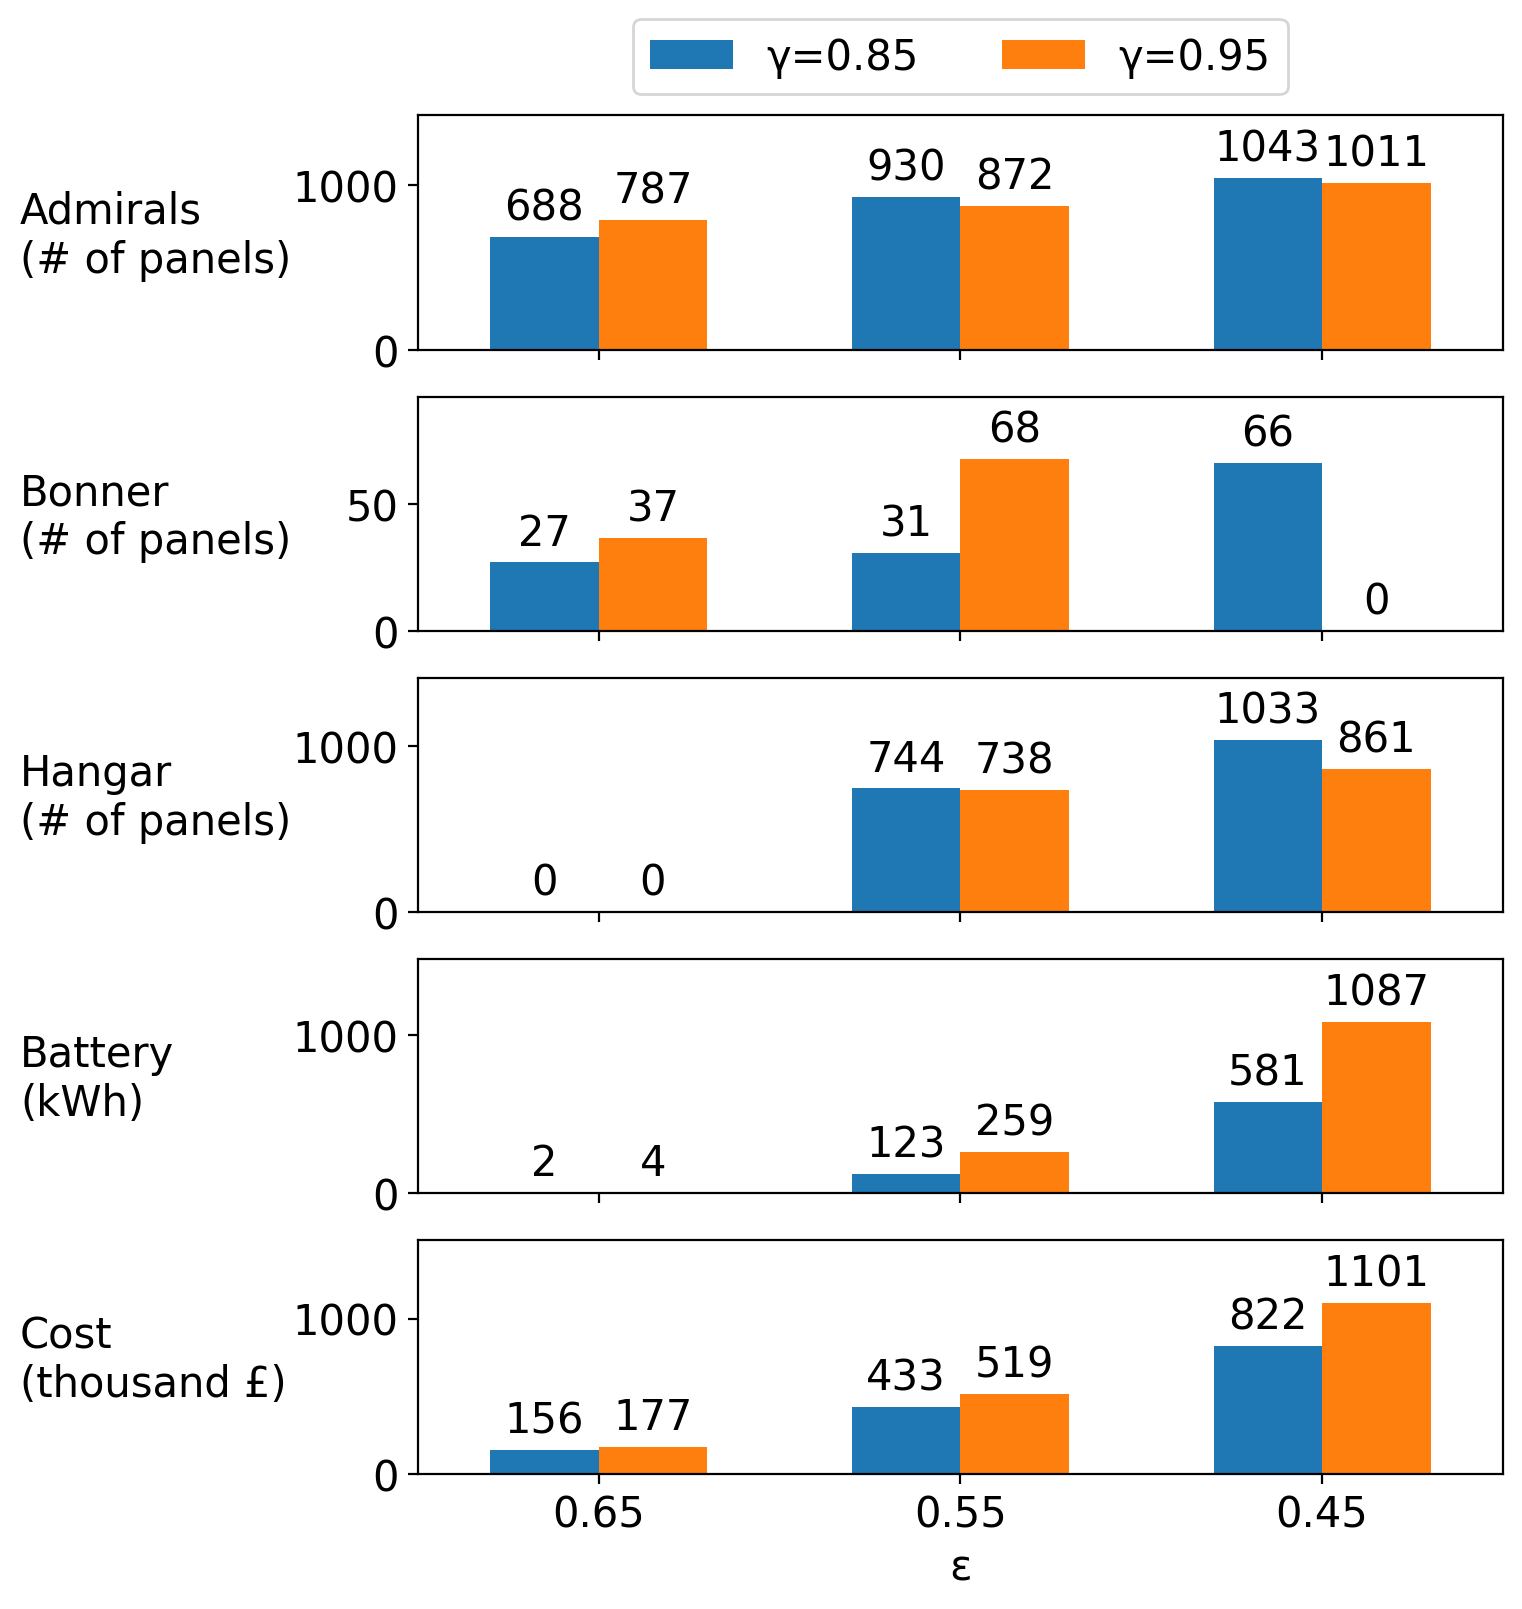

In [208]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

prms = [
    ('pv1', 'Admirals', '(# of panels)'),
    ('pv2', 'Bonner', '(# of panels)'),
    ('pv3', 'Hangar', '(# of panels)'),
    ('battery', 'Battery', '(kWh)'),
    ('thousands_cost', 'Cost', '(thousand £)')
]

fig, axes = plt.subplots(nrows=len(prms), ncols=1, figsize=(7, 1.8*len(prms)), sharex=True, dpi=200)
tot_width = 0.06

for i, (col, lbl, unit) in enumerate(prms):
#     axes[i].yaxis.set_label_position("right")
    axes[i].set_xticks([0.45, 0.55, 0.65])
    axes[i].set_xlim(0.7, 0.4)
#     axes[i].set_title(lbl + " " + unit)
#     axes[i].set_ylabel(lbl + "\n" + unit) #, rotation=0)

    gbys = df_by.groupby(['conf'])
    for j, (conf, df_conf) in enumerate(gbys):
        ep_x = df_conf['epsilon'] - tot_width / len(gbys) / 2 + tot_width / len(gbys) * (len(gbys) - j - 1)
        conf_y = df_conf[col]
        rects = axes[i].bar(ep_x, conf_y, tot_width / len(gbys), label=f'γ={conf}')
        for rect in rects:
            height = rect.get_height()
            axes[i].annotate(f'{height:.0f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
            
    axes[i].set_ylim(ymin=0, ymax=1.3 * axes[i].get_ylim()[1])
    axes[i].text(0.81, axes[i].get_ylim()[1] / 3, lbl + "\n" + unit)
        
axes[-1].set_xlabel('ε')
axes[0].legend(bbox_to_anchor=(0.5, 1.5), loc='upper center', ncol=2)

fig.subplots_adjust(hspace=0.2)
fig.show()

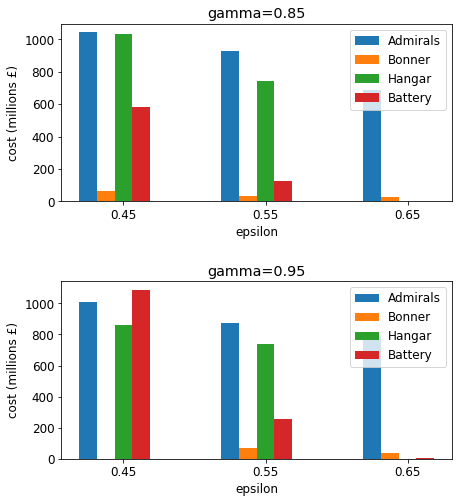

In [78]:
font = {'size'   : 12}
matplotlib.rc('font', **font)

prms = [
    ('pv1', 'Admirals'),
    ('pv2', 'Bonner'),
    ('pv3', 'Hangar'),
    ('battery', 'Battery'),
]

gbys = df_by.groupby(['conf'])

fig, axes = plt.subplots(nrows=len(gbys), ncols=1, figsize=(7, 4*len(gbys)))
tot_width = 0.05

for i, (conf, df_conf) in enumerate(gbys):
    axes[i].set_xticks([0.45, 0.55, 0.65])
    axes[i].set_title(f'gamma={conf}')
    axes[i].set_xlabel('epsilon')
    axes[i].set_ylabel('cost (millions £)')
    
    for j, (col, lbl) in enumerate(prms):
        axes[i].bar(df_conf['epsilon'] - tot_width / len(gbys) + tot_width / len(prms) * j, df_conf[col], tot_width / len(prms), label=lbl)
       
    axes[i].legend()

fig.subplots_adjust(hspace=0.45)
fig.show()